In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
dir_my   = '/home/debian/software/CHIMERA/CHIMERA/astropopulations/mass_funct/test_mass/'
dir_MGCP = '/home/debian/software/MGCosmoPop'
dir_CHIMERA = '/home/debian/software/CHIMERA/'

sys.path.append(dir_my)
sys.path.append(dir_MGCP)
sys.path.append(dir_CHIMERA)

lambda_mass  = {"lambdaPeak" :      0.039, 
                "alpha" :           3.4, # np.linspace(0.5, 10, 100), #3.4, 
                "beta" :            1.1, 
                "deltam" :          4.8, 
                "ml" :              5.1, 
                "mh" :              87., 
                "muMass" :          34., 
                "sigmaMass" :       3.6,
}

lambda_mass2  = {"lambda_peak" :      0.039, 
                "alpha" :           3.4, # np.linspace(0.5, 10, 100), #3.4, 
                "beta" :            1.1, 
                "delta_m" :          4.8, 
                "ml" :              5.1, 
                "mh" :              87., 
                "mu_g" :          34., 
                "sigma_g" :       3.6,
}




from CHIMERA.cosmo import fLCDM
from CHIMERA.cosmo import fLCDM_jax

from CHIMERA.astro import mass
from CHIMERA.astro import mass_jax

z_test = np.linspace(0.1, 10, 1000)
m1 = np.linspace(10, 100, 1000)
m2 = m1/2

### Cosmo

In [47]:
%%time
dL1 = fLCDM.dL(z_test, {"Om0":0.3, "H0":70.0})

CPU times: user 1.63 ms, sys: 0 ns, total: 1.63 ms
Wall time: 1.35 ms


In [49]:
%%time
dL2 = fLCDM_jax.dL(z_test, {"Om0":0.3, "H0":70.0})


CPU times: user 5.33 ms, sys: 0 ns, total: 5.33 ms
Wall time: 4.21 ms


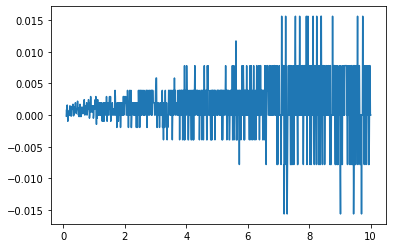

In [56]:
plt.plot(z_test, dL1-dL2)

### Mass

In [4]:
%%time 
m13 = mass.logpdf_PLP(m1,m2, lambda_mass2)

CPU times: user 6.49 ms, sys: 0 ns, total: 6.49 ms
Wall time: 6.69 ms


In [5]:
%%time 
m23 = mass_jax.logpdf_PLP(m1,m2, lambda_mass2)

CPU times: user 1.51 s, sys: 11 ms, total: 1.52 s
Wall time: 1.6 s


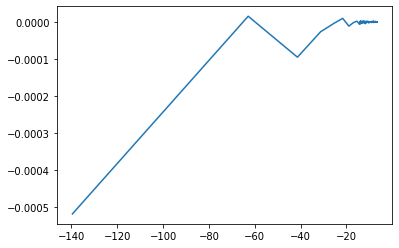

In [6]:
plt.plot(m13, m13-m23)

In [7]:
dL2

Array([   460.30008,    509.26404,    558.8071 ,    608.918  ,
          659.59625,    710.8314 ,    762.61536,    814.945  ,
          867.8136 ,    921.2139 ,    975.13904,   1029.5842 ,
         1084.542  ,   1140.0085 ,   1195.976  ,   1252.438  ,
         1309.3888 ,   1366.8231 ,   1424.7332 ,   1483.1167 ,
         1541.9652 ,   1601.2739 ,   1661.0375 ,   1721.2507 ,
         1781.9078 ,   1843.0004 ,   1904.5282 ,   1966.4818 ,
         2028.8578 ,   2091.651  ,   2154.8542 ,   2218.4668 ,
         2282.48   ,   2346.8904 ,   2411.6914 ,   2476.8801 ,
         2542.4512 ,   2608.3984 ,   2674.7212 ,   2741.4111 ,
         2808.4656 ,   2875.8782 ,   2943.647  ,   3011.7642 ,
         3080.2302 ,   3149.036  ,   3218.1814 ,   3287.661  ,
         3357.4707 ,   3427.604  ,   3498.061  ,   3568.8352 ,
         3639.925  ,   3711.3242 ,   3783.0293 ,   3855.0386 ,
         3927.348  ,   3999.951  ,   4072.8481 ,   4146.033  ,
         4219.5063 ,   4293.2607 ,   4367.292  ,   4441

In [8]:
fLCDM.ddL_dz_jax(1.0, {"Om0":0.3, "H0":70.0})

AttributeError: module 'CHIMERA.cosmo.fLCDM' has no attribute 'ddL_dz_jax'

In [ ]:
import jax_cosmo

In [ ]:
%%time

cosmo = jax_cosmo.Planck15(h=0.7)

a = np.linspace(0.01, 1.,1000)

# And compute the comoving distance for these scale factors 
chi = jax_cosmo.background.radial_comoving_distance(cosmo, a)

CPU times: user 219 ms, sys: 0 ns, total: 219 ms
Wall time: 235 ms


In [ ]:
%%time

fLCDM.dC(a, {"Om0":0.3, "H0":70.0})

NameError: name 'a' is not defined